# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [107]:
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

In [108]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


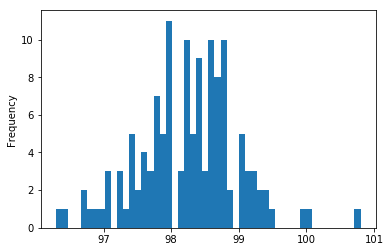

In [109]:
# Plot a histogram of body temperatures
df['temperature'].plot(kind='hist',bins=50)

In [110]:
# A normality test on the data
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The temperature distribution looks normal from the histogram. Moreover, the normality test can not reject he null hypothesis that it comes from a normal distribution. So we will assume the distribution of body temperatures is normal.

# 2. Is the sample size large? Are the observations independent?

In [111]:
# Sample size
n = df.shape[0]
n

130

The dataset has 130 samples, which is a relatively large sample size. The observations are independent since they are observed from different people.

# 3. Is the true population mean really 98.6 degrees F?

We will treat this dataset as one group of samples to answer this question. Therefore, a one-sample test will be used. Since the sample size is greater than 30, we will use z statistic in this situation.

In [112]:
# calculate mean and standard deviation of sampled body temperatures
temperature_mean = df.temperature.mean()
temperature_std = df.temperature.std()
print ('The mean of sampled body temperatures is {:.2f}; Their standard deviation is {:.2f}.'
       .format(temperature_mean,temperature_std))

The mean of sampled body temperatures is 98.25; Their standard deviation is 0.73.


We do not know the population standard deviation, but we will estimate it with the sample standard deviation since the smaple size is large enough. We that in mind, let's calculate the z statistic and the p value

In [113]:
test_statistic = 98.6 - temperature_mean
sample_standard_error = temperature_std / np.sqrt(n)
z_statistic = test_statistic / sample_standard_error
p_value_z = stats.norm.sf(np.abs(z_statistic))*2
p_value_z

4.9021570141133797e-08

Result shows the probability of occurrence of a test statistic that extreme if the true population mean is 98.6 degrees F is smaller than 0.0001. Therefore, we can safely draw the conclusion that the true population mean is not 98.6 degrees F.

Now, let's try to use t statistic to answer the same question:

In [114]:
t_statistic = test_statistic / sample_standard_error
p_value_t = stats.t.sf(np.abs(t_statistic), n-1)*2
p_value_t

2.4106320415609943e-07

Result shows we can draw the same conclusion from the t statistic.

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

We will use a margin of error of 5%, or a confidence interval of 95%. The corresponding z statistic is 1.96.

In [115]:
lower_limit = temperature_mean - 1.96 * temperature_std
higher_limit = temperature_mean + 1.96 * temperature_std
print ("We consider someone's temperature to be abnormal is his or her temperature is below {:.1f} or above {:.1f}".
      format(lower_limit,higher_limit))

We consider someone's temperature to be abnormal is his or her temperature is below 96.8 or above 99.7


# 5. Is there a significant difference between males and females in normal temperature?

Let's take a look of the new sample sizes:

In [116]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']
print ('Sample size for male is {}; sample size for female is {}'.format(df_male.shape[0],df_female.shape[0]))

Sample size for male is 65; sample size for female is 65


And the difference of the mean:

In [117]:
diff_mean = np.abs(df_male.temperature.mean() - df_female.temperature.mean())
diff_mean

0.28923076923072699

We will use a two-sample hypothesis test to answer this question.

h0 = There is not a significant difference between males and females in normal temperature

h1 = There is a significant difference between males and females in normal temperature

Under h0, we will then shuffle and resample the original sample to see how likely the observed difference of the mean occurs

In [118]:
def resample(sample_array):
    np.random.shuffle(sample_array)
    resample_diff_mean = np.abs(sample_array[:36].mean() - sample_array[36:].mean())
    return resample_diff_mean
test_statistics = np.array([resample(df.temperature.values) for i in range(10000)])
p_value = (test_statistics > diff_mean).sum()/len(test_statistics)
p_value

0.045600000000000002

Since p value < 0.05, we can reject the null hypothesis and draw the conclusion that there is a significant difference between males and females in normal temperature.

# Conclusion
The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. However, the statistical inference from a sample of 130 body temperatures lead to the conclusion that it is not ture. Moreover, we found there is a significant difference between males and females in normal temperature.